<a href="https://colab.research.google.com/github/DanielP53/Labs-SP1/blob/master/Laboratorio%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importacion de las librerias

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [0]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

Testeo del clasificador de imagenes ya hecho

In [0]:
IMAGE_SIZE = (224, 224)

In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 

In [0]:
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

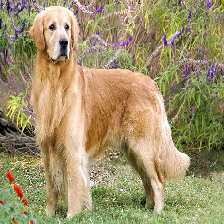

In [0]:
test_image = get_file('img.jpg','https://disenlis.com/wp-content/uploads/2019/01/Golden-Retriever-Standing1.jpg')
test_image = Image.open(test_image).resize(IMAGE_SIZE)
test_image

In [0]:
test_image = np.array(test_image)/255.0
test_image.shape

(224, 224, 3)

In [0]:
result = classifier.predict(test_image[np.newaxis, ...])
result.shape

(1, 1001)

In [0]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

208

In [0]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

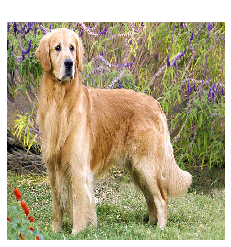

In [0]:
predicted_class_name = imagenet_labels[predicted_class]

plt.axis('off')
plt.title("Label: " + predicted_class_name, color = 'white')
plt.imshow(test_image)
plt.show()

# Transfer Learning

Construccion del Dataset

In [0]:
class_names = ['deadpool','spiderman']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_sp_dir = os.path.join(train_dir, 'spiderman')  
train_dp_dir = os.path.join(train_dir, 'deadpool')  
validation_sp_dir = os.path.join(validation_dir, 'spiderman') 
validation_dp_dir = os.path.join(validation_dir, 'deadpool')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_sp_dir)
os.makedirs(train_dp_dir)
os.makedirs(validation_sp_dir)    
os.makedirs(validation_dp_dir)

In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return


In [0]:
img_dir = os.path.realpath('Images/')

In [0]:
queries = ['tom holland','avengers','cosplay','costume']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='spiderman '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_sp_dir, validation_sp_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=spiderman tom holland&source=lnms&tbm=isch
Total Time : 0:00:02.281110
Invalid image:  89.jpg cannot write mode RGBA as JPEG
Invalid image:  22.jpg cannot write mode RGBA as JPEG
Invalid image:  60.jpg cannot write mode RGBA as JPEG
Invalid image:  53.jpg cannot write mode P as JPEG
Invalid image:  26.jpg cannot write mode P as JPEG
Invalid image:  99.jpg cannot write mode RGBA as JPEG
https://www.google.co.in/search?q=spiderman avengers&source=lnms&tbm=isch
Total Time : 0:00:02.936744
Invalid image:  17.jpg cannot identify image file '/content/Images/17.jpg'
Invalid image:  86.jpg cannot identify image file '/content/Images/86.jpg'
Invalid image:  55.jpg cannot identify image file '/content/Images/55.jpg'
Invalid image:  85.jpg cannot identify image file '/content/Images/85.jpg'
Invalid image:  63.jpg cannot write mode RGBA as JPEG
Invalid image:  40.jpg cannot identify image file '/content/Images/40.jpg'
Invalid image:  32.jpg cannot write mode RGBA 

In [0]:
queries = ['ryan reynolds','xforce','costume','cosplay']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='deadpool '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_dp_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=deadpool ryan reynolds&source=lnms&tbm=isch
Total Time : 0:00:00.000395
Invalid image:  72.jpg cannot identify image file '/content/Images/72.jpg'
https://www.google.co.in/search?q=deadpool xforce&source=lnms&tbm=isch
Error  HTTPSConnectionPool(host='www.eknightmedia.com', port=443): Max retries exceeded with url: /media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/6/0/603259046869.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),))
Invalid image:  7.jpg cannot write mode RGBA as JPEG
Invalid image:  28.jpg cannot write mode RGBA as JPEG
Invalid image:  29.jpg cannot write mode RGBA as JPEG
Invalid image:  72.jpg cannot identify image file '/content/Images/72.jpg'
Invalid image:  5.jpg cannot write mode P as JPEG
https://www.google.co.in/search?q=deadpool costume&source=lnms&tbm=isch
Total Time : 0:00:04.448902
Invalid image:  60.jpg cannot identify image file '/content/Ima

In [0]:
total_train = len(os.listdir(train_sp_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_sp_dir))+ len(os.listdir(validation_dp_dir))

print('total training Spiderman images:', len(os.listdir(train_sp_dir)))
print('total training Deadpool images:', len(os.listdir(train_dp_dir)))

print('total validation Spiderman images:', len(os.listdir(validation_sp_dir)))
print('total validation Deadpool images:', len(os.listdir(validation_dp_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Spiderman images: 345
total training Deadpool images: 342
total validation Spiderman images: 40
total validation Deadpool images: 40
--
Total training images: 687
Total validation images: 80


Utilizando el Dataset

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [0]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 687 images belonging to 2 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 80 images belonging to 2 classes.


Probando el clasificador

In [0]:
image_batch, labels_batch = next(train_data_gen)

In [0]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [0]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['knee pad', 'suit', 'pajama', 'muzzle', 'knee pad', 'cuirass',
       'stole', 'ski', 'violin', 'ski mask', 'pot', 'gasmask',
       'swimming trunks', 'tripod', 'maillot', 'violin', 'breastplate',
       'maillot', 'balance beam', 'ski mask', 'dumbbell', 'cuirass',
       'ski', 'ski', 'rock crab', 'cuirass', 'toyshop', 'ski', 'ski',
       'carousel', 'swimming trunks', 'tripod'], dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

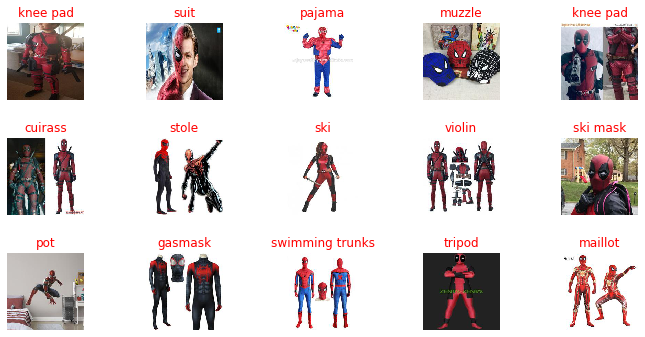

In [0]:
plot_images(image_batch, labels_batch, predicted_class_names)

Descarga de un modelo sin la ultima capa

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [0]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

Agregando la capa de clasificacion

In [0]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_8 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


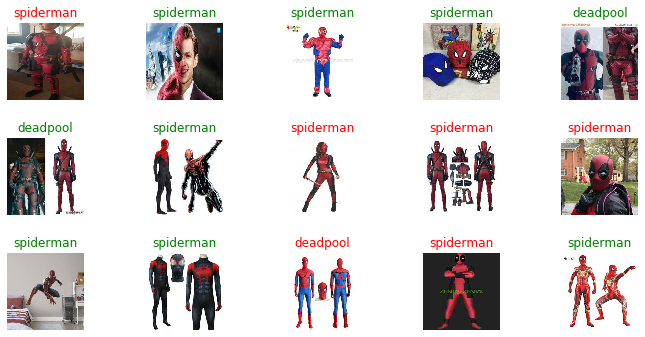

In [0]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

Entrenamiento del modelo

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 1/5
5/5 [==============================] - 30s 6s/step - loss: 1.7053 - accuracy: 0.5188 - val_loss: 0.4999 - val_accuracy: 0.8000
Epoch 2/5
5/5 [==============================] - 27s 5s/step - loss: 0.9717 - accuracy: 0.7000 - val_loss: 0.3683 - val_accuracy: 0.8125
Epoch 3/5
5/5 [==============================] - 27s 5s/step - loss: 0.6387 - accuracy: 0.7812 - val_loss: 0.3698 - val_accuracy: 0.8125
Epoch 4/5
5/5 [==============================] - 25s 5s/step - loss: 0.4869 - accuracy: 0.8112 - val_loss: 0.4438 - val_accuracy: 0.8000
Epoch 5/5
5/5 [==============================] - 25s 5s/step - loss: 0.4419 - accuracy: 0.8042 - val_loss: 0.3955 - val_accuracy: 0.7750


Resultados

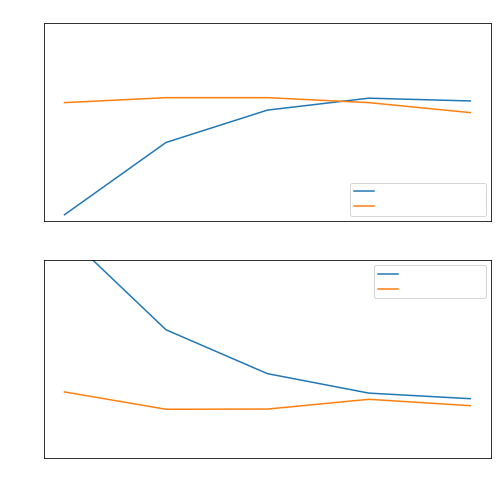

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

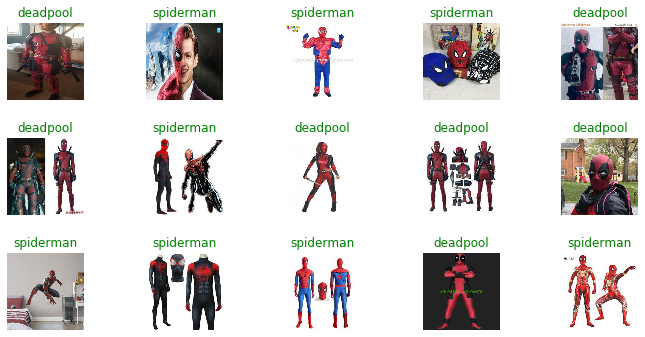

In [0]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)

Aplicacion del modelo

In [0]:
base_model = ResNet50V2(input_shape=IMAGE_SIZE+(3,),
                                               include_top=False,
                                               weights='imagenet')

In [0]:
base_model.trainable = False

In [0]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [0]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 1/5
5/5 [==============================] - 38s 8s/step - loss: 0.7487 - accuracy: 0.6062 - val_loss: 1.0477 - val_accuracy: 0.7125
Epoch 2/5
5/5 [==============================] - 33s 7s/step - loss: 0.7737 - accuracy: 0.6875 - val_loss: 0.5718 - val_accuracy: 0.7625
Epoch 3/5
5/5 [==============================] - 33s 7s/step - loss: 0.4570 - accuracy: 0.8188 - val_loss: 0.9318 - val_accuracy: 0.7250
Epoch 4/5
5/5 [==============================] - 33s 7s/step - loss: 0.6068 - accuracy: 0.7250 - val_loss: 0.6646 - val_accuracy: 0.7875
Epoch 5/5
5/5 [==============================] - 33s 7s/step - loss: 0.4056 - accuracy: 0.8062 - val_loss: 0.4754 - val_accuracy: 0.8000


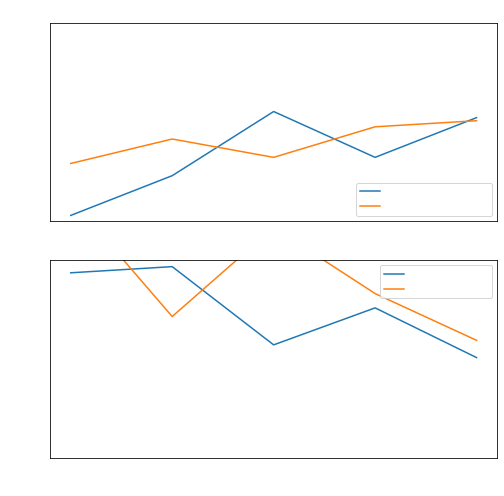

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.8])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

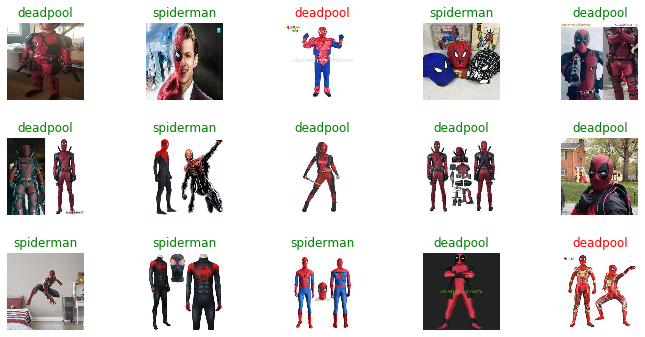

In [0]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)